In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import umap
import nltk;
import spacy
import string

import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(10,8)})

np.random.seed(42)
%config Completer.use_jedi = False
pd.set_option('display.max_columns', 30)
# pd.set_option('display.max_rows', 100)

nlp = spacy.load("en_core_web_sm")

In [2]:
df = pd.read_csv('hsbc_comments.csv')
df.rename(columns={"message":"comments"},inplace=True)
df.head()

,comments
0,I would like to say a massive thank you to HSB...
1,"""Imaginations Run Wild?"" my backside- try gett..."
2,If you would send me the neccesary number I wo...
3,"Just past 1 hour waiting again, for the 3rd ti..."
4,Melanie Humberstone


In [3]:
df.comments[286]

'This type of service is now happening everywhere!!!  I feel your pain!!!   Hope you guys are good.   If you need anything just ask \\U0001f44d\\U0001f3fc'

In [4]:
# df.comments.replace("\S*@\S*" , "", regex=True, inplace = True)
# df.comments.replace("\S*#\S*" , "", regex=True, inplace = True)
# df.comments.replace("\S*http\S*" , "", regex=True, inplace = True)
# df.comments.replace("_" , " ", regex=True, inplace = True)
# df.comments.replace("^" , " ", regex=True, inplace = True)
# df.comments.replace("\n" , " ", regex=True, inplace = True)

In [5]:
df.comments[286]

' This type of service is now happening everywhere!!!  I feel your pain!!!   Hope you guys are good.   If you need anything just ask \\U0001f44d\\U0001f3fc'

In [6]:
# for i in string.punctuation:
#     try:
#         df.comments.replace(f"\{i}" , "", regex=True, inplace = True)
#     except: pass

In [7]:
df.comments[286]

' This type of service is now happening everywhere  I feel your pain   Hope you guys are good   If you need anything just ask U0001f44dU0001f3fc'

In [9]:
# def remove_unicode(text):

#     try:
#         text = text.encode("latin_1").decode("raw_unicode_escape").encode('utf-16', 'surrogatepass').decode('utf-16')
#     except:
#         text = text

#     emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#         u"\U00002500-\U00002BEF"  # chinese char
#         u"\U00002702-\U000027B0"
#         u"\U00002702-\U000027B0"
#         u"\U000024C2-\U0001F251"
#         u"\U0001f926-\U0001f937"
#         u"\U00010000-\U0010ffff"
#         u"\u2640-\u2642" 
#         u"\u2600-\u2B55"
#         u"\u200d"
#         u"\u23cf"
#         u"\u23e9"
#         u"\u231a"
#         u"\ufe0f"  # dingbats
#         u"\u3030"
#         "]+", re.UNICODE)

#     text = re.sub(emoji_pattern, '', str(text))
#     text = ''.join(text.split('\\n')) # to remove uncompiled \n
#     text = re.sub('\n', '', text)     # to remove compiled \n

#     return text

In [10]:
# def word_root(text):
#     list_data3=[]
#     text = remove_unicode(text)
#     doc = nlp(text)
#     for token in doc:
#         if token.text.isalpha():
#             lemma = token.lemma_
#             list_data3.append(lemma)
#         else:pass
#     return " ".join(list_data3)
# df.comments = df.comments.apply(lambda x: word_root(str(x).lower()))  

In [11]:
df.comments.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                15
be glad to introduce to you this genuine company to earn cool cash while stay at home I be benefit from this company till datethat be why be share the goodnew with y

In [3]:
df.replace('nan', np.nan, inplace = True)
df.replace('', np.nan, inplace = True)
df.replace('do', np.nan, inplace = True)
df = df.dropna()

In [4]:
df.comments.value_counts()

Two different phones - both on hold - One for business banking (3hrs+ consecutive calls), and the other on hold - personal banking.\n\nGot through to someone who I specifically told not to put me on hold and transfer me straight over - they advised they would do so and would come back to me in two minutes. This was twenty minutes ago!!\n\nHSBC STAFF ARE LIARS AND CON ARTISTS TO GET YOU OFF THE PHONE.\n\nTIME FOR THE FINANCIAL OMBUDSMEN!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             10


In [5]:
list_data = df.comments.unique().tolist()

In [6]:
len(list_data)

906

In [7]:
from sentence_transformers import SentenceTransformer

In [8]:
# distilbert-base-nli-mean-tokens
# paraphrase-distilroberta-base-v1
# roberta-large-nli-stsb-mean-tokens
#allenai-specter


In [9]:
model=SentenceTransformer('xlm-r-distilroberta-base-paraphrase-v1')
embeddings = model.encode(list_data, show_progress_bar=True)

Batches:   0%|          | 0/29 [00:00<?, ?it/s]

In [10]:
best_model = umap.UMAP(n_components=5).fit_transform(embeddings)

#n_neighbors=10, min_dist=0.0, 

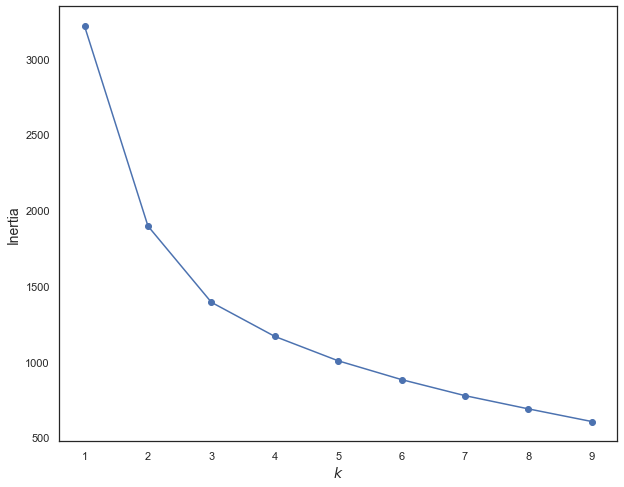

In [11]:
#inertia

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(best_model)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [12]:
from nltk.cluster import KMeansClusterer,euclidean_distance
clusterer =KMeansClusterer(3,euclidean_distance)
cluster=np.array(clusterer.cluster(best_model,True))

In [84]:
cluster = KMeans(n_clusters=5, init="k-means++").fit_predict(best_model)

In [13]:
def plot(cluster = cluster):    

    clustered = (cluster >= 0)
    reduced_dim = umap.UMAP(n_components=2).fit_transform(embeddings)



    unique, counts = np.unique(cluster, return_counts=True)
    print(dict(zip(unique, counts)))

    plt.scatter(reduced_dim[~clustered, 0],
                reduced_dim[~clustered, 1],
                c=(0.5,0.5,0.5),
                # s=1,
                alpha=0.5
                )
    plt.scatter(reduced_dim[clustered, 0],
                reduced_dim[clustered, 1],
                c=cluster[clustered],
                # s=1,
                cmap='Accent')
    plt.show()

{0: 221, 1: 506, 2: 179}


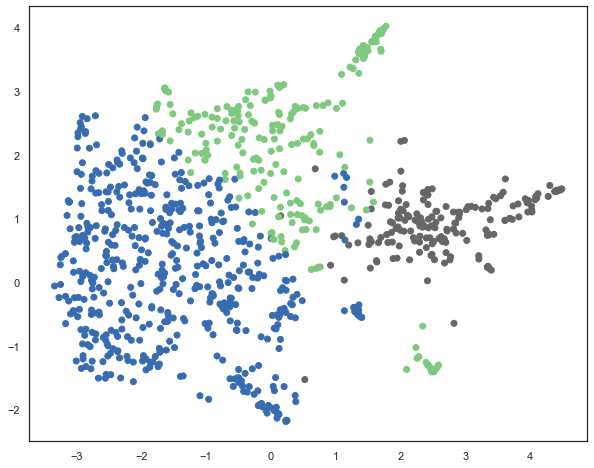

In [14]:
plot()

In [87]:
len(cluster)

880

In [88]:
docs = pd.DataFrame(list_data,columns=["comments"])
docs["cluster"] = cluster
labeled_docs = docs.groupby(["cluster"], as_index=False).agg({"comments": " ".join})
labeled_docs.comments.replace(r"\S*hsbc\S*", "", regex=True, inplace = True)
labeled_docs.comments.replace(r"\S*bank\S*", "", regex=True, inplace = True)
labeled_docs.comments.replace(r"\S*barc\S*", "", regex=True, inplace = True)
labeled_docs.comments.replace(r"hypocrisy hypocrisy", "hypocrisy", regex=True, inplace = True)
labeled_docs.comments.replace(r"hypocrisy hypocrisy", "hypocrisy", regex=True, inplace = True)

def shortener(text):
    word_list = []
    text = text.split(" ")
    [word_list.append(i) for i in text if len(i)>2]
    return(" ".join(word_list))

labeled_docs.comments = labeled_docs.comments.apply(lambda x:shortener(x))
labeled_docs

,cluster,comments
0,0,imagination run wild backside try get your bas...
1,1,would like say massive thank you and the telep...
2,2,you would send the neccesary number would use ...
3,3,should know all about this mexico brazil big f...
4,4,melanie humberstone brilliant notice how they ...


In [89]:
from keybert import KeyBERT
array_text = labeled_docs.comments.tolist()
    
kw_extractor = KeyBERT(model=model)
trigram = []
for j in range(len(array_text)):
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=10,keyphrase_ngram_range=(3, 3))
    print(f'\033[1m   Trigram Cluster {j+1}: \033[0m')
    print([word for word in keywords])
    trigram.append([word[0] for word in keywords])

   Trigram Cluster 1: 
[('service benn try', 0.5282), ('service right try', 0.5104), ('service try day', 0.5103), ('account desperatley try', 0.5016), ('group try account', 0.4993), ('try customer service', 0.4894), ('try fix situation', 0.4756), ('hubby try hour', 0.4724), ('try time try', 0.4714), ('try business helpline', 0.4683)]
   Trigram Cluster 2: 
[('say massive thank', 0.4773), ('account send letter', 0.4753), ('send letter bad', 0.4632), ('close account refuse', 0.4589), ('account information thank', 0.4572), ('thank inform offer', 0.4557), ('love donate year', 0.4557), ('thank telephone staff', 0.4413), ('efficient love donate', 0.4358), ('massive thank telephone', 0.4297)]
   Trigram Cluster 3: 
[('hour wait phone', 0.5208), ('try telephone number', 0.5191), ('hour phone try', 0.5144), ('phone wait hour', 0.5137), ('telephone wait minute', 0.5056), ('wait phone hour', 0.5032), ('online service wait', 0.5018), ('contact wait hour', 0.4996), ('text hour wait', 0.4995), ('ans

In [90]:
bigram=[]
for j in range(len(array_text)):
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=10,keyphrase_ngram_range=(2, 2))
    print(f'\033[1m   Bigram Cluster {j+1}: \033[0m' )
    print([word for word in keywords])
    bigram.append([word[0] for word in keywords])

   Bigram Cluster 1: 
[('service try', 0.4963), ('try account', 0.4757), ('hour try', 0.456), ('try refund', 0.4551), ('try send', 0.4517), ('chat try', 0.4493), ('occasion try', 0.4491), ('try blame', 0.4467), ('time try', 0.4448), ('weekend try', 0.4447)]
   Bigram Cluster 2: 
[('love donate', 0.4591), ('resolve thank', 0.4472), ('send cheque', 0.4333), ('fraudster thank', 0.4331), ('account send', 0.4311), ('thank inform', 0.4218), ('forever send', 0.4148), ('massive thank', 0.4138), ('send letter', 0.4069), ('send money', 0.4054)]
   Bigram Cluster 3: 
[('telephone wait', 0.4883), ('try phone', 0.4602), ('phone wait', 0.4594), ('telephone try', 0.4589), ('try telephone', 0.4541), ('complain telephone', 0.4475), ('phone try', 0.4341), ('contact wait', 0.4253), ('send number', 0.4245), ('telephone number', 0.4222)]
   Bigram Cluster 4: 
[('clawback pension', 0.5182), ('interesting pension', 0.5024), ('great pension', 0.5007), ('huge pension', 0.4996), ('meagre pension', 0.4961), ('pe

In [91]:
unigram=[]
for j in range(len(array_text)):
    keywords = kw_extractor.extract_keywords(array_text[j],top_n=10,keyphrase_ngram_range=(1, 1))
    print(f'\033[1m   Unigram Cluster {j+1}: \033[0m' )
    print([word for word in keywords])
    unigram.append([word[0] for word in keywords])

   Unigram Cluster 1: 
[('try', 0.3976), ('stay', 0.3099), ('attempt', 0.3064), ('worknnplease', 0.2992), ('servicenmr', 0.2978), ('arrange', 0.2964), ('accountnnthe', 0.295), ('insist', 0.2937), ('excuse', 0.2934), ('complain', 0.2932)]
   Unigram Cluster 2: 
[('thankfully', 0.3769), ('thank', 0.3623), ('wish', 0.3286), ('grateful', 0.3283), ('send', 0.3238), ('letter', 0.3105), ('careful', 0.307), ('kind', 0.3062), ('card', 0.3022), ('mail', 0.2997)]
   Unigram Cluster 3: 
[('telephoneneven', 0.3735), ('internettelephone', 0.3304), ('telephone', 0.3227), ('appregister', 0.3), ('callback', 0.2676), ('thisnplease', 0.265), ('registeruse', 0.2606), ('complaintnnnobody', 0.2507), ('phone', 0.2472), ('customernyou', 0.2454)]
   Unigram Cluster 4: 
[('pensioner', 0.3448), ('pension', 0.3347), ('fraud', 0.3121), ('trustee', 0.272), ('disgrace', 0.264), ('pay', 0.2413), ('retirement', 0.237), ('clawback', 0.2361), ('brazil', 0.2351), ('retire', 0.2351)]
   Unigram Cluster 5: 
[('demiparadise

In [92]:
for i in range(4):
    clusterer=[]
    print(f'\033[1m   Cluster {i+1}: \033[0m')
    clusterer.append(trigram[i][0])
    
    wor=[]
    for w in trigram[i][1].split(" "):
        wor.append(w in trigram[i][0])
    if all(wor):
        clusterer.append(trigram[i][2])
    else:
        clusterer.append(trigram[i][1])
        
    for m, n in zip(trigram[i][0:2]*5,bigram[i][0:10]):
        first,second = n.split(" ")
        if not(first in m and second in m) and (first != second):
            clusterer.append(n)
    clusterer = clusterer[:5]
    [clusterer.append(j) for j in unigram[i]]
    print(clusterer)
    

   Cluster 1: 
['service benn try', 'service right try', 'try account', 'hour try', 'try refund', 'try', 'stay', 'attempt', 'worknnplease', 'servicenmr', 'arrange', 'accountnnthe', 'insist', 'excuse', 'complain']
   Cluster 2: 
['say massive thank', 'account send letter', 'love donate', 'resolve thank', 'send cheque', 'thankfully', 'thank', 'wish', 'grateful', 'send', 'letter', 'careful', 'kind', 'card', 'mail']
   Cluster 3: 
['hour wait phone', 'try telephone number', 'telephone wait', 'try telephone', 'complain telephone', 'telephoneneven', 'internettelephone', 'telephone', 'appregister', 'callback', 'thisnplease', 'registeruse', 'complaintnnnobody', 'phone', 'customernyou']
   Cluster 4: 
['tell great pension', 'clawback pension unbelievably', 'clawback pension', 'interesting pension', 'huge pension', 'pensioner', 'pension', 'fraud', 'trustee', 'disgrace', 'pay', 'retirement', 'clawback', 'brazil', 'retire']
